In [1]:
from agents.reinforce import ReinforcePolicyGradientsAgent 
from models.cnns import CNNBackbone
from envs.gym_env import RewardWrapper, ChannelFirstWrapper, NormalizeWrapper, ChannelWiseFrameStack
from gymnasium.wrappers import AtariPreprocessing, FrameStackObservation, RecordVideo
import datetime
import gymnasium as gym
import ale_py
import torch

# Enable autoreload for all modules
%load_ext autoreload
%autoreload 2

In [2]:
# Get the current timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Create the Gymnasium environment
env = gym.make("ALE/Surround-v5", render_mode="rgb_array", mode=2, difficulty=1, frameskip=5)
game = "Surround"


# Wrap the environment with RecordVideo to record videos
video_folder = f"./videos/videos_{game}_{timestamp}/"

# Make directory if it doesn't exist
import os
os.makedirs(video_folder, exist_ok=True)

render_game_every_n = 5
env = RecordVideo(
    env,
    video_folder=video_folder,
    episode_trigger=(lambda episode_id: episode_id % render_game_every_n == 0),
    fps=120
)
env = AtariPreprocessing(
    env,
    noop_max=15,
    frame_skip=1,
    screen_size=84,
    scale_obs=True,
    grayscale_obs=False
)

env = ChannelFirstWrapper(env)

# env = FrameStackObservation(env, 4)
# env = ChannelWiseFrameStack(env)

# env = NormalizeWrapper(env)

A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]
/home/bytemarish/miniconda3/envs/slitherl/lib/python3.10/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /home/bytemarish/ACM_AI/SlitheRL_Cleaned/videos/videos_Surround_20250128_234254 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create the policy with CNN backbone
policy = ReinforcePolicyGradientsAgent(env=env, device=device, use_cnn=True)
print(policy.model)

CNN Dummy Output Shape: torch.Size([1, 10368])
CNNBackbone(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (fc): Linear(in_features=10368, out_features=5, bias=True)
)


In [4]:
print(env.observation_space)

Box(0.0, 255.0, (3, 84, 84), float32)


In [5]:
history = []

for i in range(10):
    results_dict = policy.run_episode(env)
    print(results_dict)
    history.append(results_dict)

{'total_return': -10.0, 'policy_loss': 0.4318389892578125, 'entropy_loss': -1250.329345703125, 'total_loss': 0.3068060576915741, 'steps': 777}
{'total_return': -10.0, 'policy_loss': -8.54925537109375, 'entropy_loss': -1413.831298828125, 'total_loss': -8.690638542175293, 'steps': 886}
{'total_return': -10.0, 'policy_loss': -3.0162391662597656, 'entropy_loss': -1334.2001953125, 'total_loss': -3.1496591567993164, 'steps': 880}
{'total_return': -10.0, 'policy_loss': 10.869125366210938, 'entropy_loss': -1421.2607421875, 'total_loss': 10.726999282836914, 'steps': 1082}
{'total_return': -10.0, 'policy_loss': -0.7028884887695312, 'entropy_loss': -1203.871826171875, 'total_loss': -0.8232756853103638, 'steps': 998}
{'total_return': -10.0, 'policy_loss': -24.079864501953125, 'entropy_loss': -1051.666748046875, 'total_loss': -24.18503189086914, 'steps': 949}
{'total_return': -10.0, 'policy_loss': 7.3890533447265625, 'entropy_loss': -850.7774658203125, 'total_loss': 7.303975582122803, 'steps': 978}

   total_return  policy_loss  entropy_loss  total_loss  steps
0         -10.0     0.431839  -1250.329346    0.306806    777
1         -10.0    -8.549255  -1413.831299   -8.690639    886
2         -10.0    -3.016239  -1334.200195   -3.149659    880
3         -10.0    10.869125  -1421.260742   10.726999   1082
4         -10.0    -0.702888  -1203.871826   -0.823276    998
5         -10.0   -24.079865  -1051.666748  -24.185032    949
6         -10.0     7.389053   -850.777466    7.303976    978
7         -10.0    25.018486   -592.632690   24.959223    946
8         -10.0    65.816643   -531.722046   65.763474    918
9         -10.0   -11.932993   -623.707153  -11.995363    923


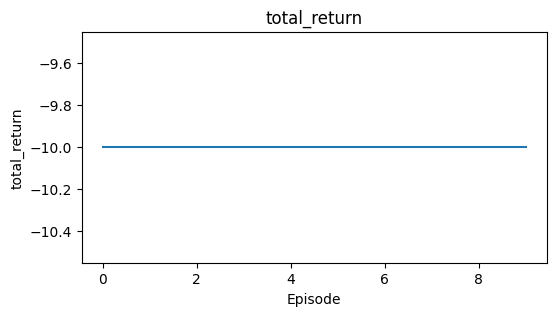

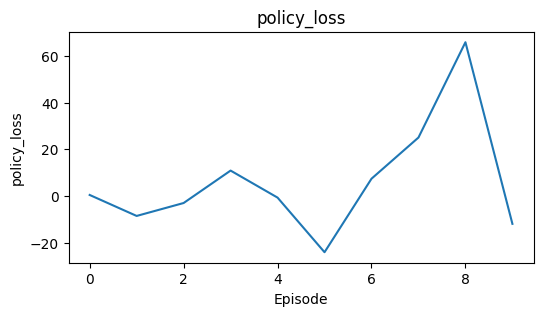

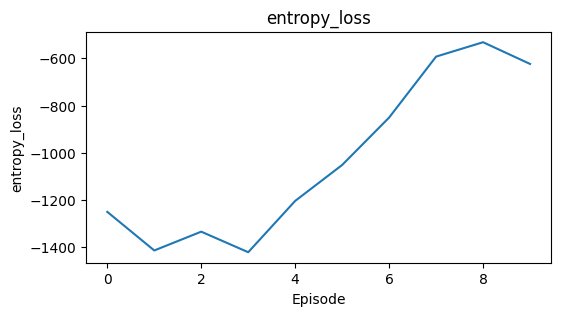

In [6]:
import matplotlib.pyplot as plt

# convert every history dict to a dataframe
import pandas as pd
df = pd.DataFrame(history)
print(df)
# {'total_return': -10.0, 'policy_loss': -7.564835071563721, 'entropy_loss': -160.30296325683594, 'total_loss': -7.580865383148193}

# make a function to plot the history
def plot_from_history(df, title, size=(6, 3)):
    plt.figure(figsize=size)
    plt.plot(df[title])
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel(title)
    plt.show()

plot_from_history(df, 'total_return')
plot_from_history(df, 'policy_loss')
plot_from_history(df, 'entropy_loss')




In [7]:
!mkdir -p ./models/
torch.save(policy.state_dict(), f"./models/model_{timestamp}.pth")

AttributeError: 'ReinforcePolicyGradientsAgent' object has no attribute 'state_dict'